### Codio Activity 16.2: Decision Boundaries for Different Classification Models

**Expected Time = 60 minutes**

**Total Points = 50**

This activity continues to examine how different classifiers decision boundaries shift as parameters change.  Both the `DecisionTreeClassifier` and its `max_depth` hyperparameter and the `KNeighborsClassifier` and its `n_neighbors` parameter will be explored.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

### The Data

Below, the scikitlearn wine dataset from the videos is loaded and displayed.  You will follow the example using `['total_phenols', 'color_intensity']` as predictors.  The `make_plot` function will plot the decision boundary of a given estimator.

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X1 = X[['total_phenols', 'color_intensity']]

In [4]:
def make_plot(estimator):
    xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
    yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
    XX, YY = np.meshgrid(xx, yy)
    grid = np.c_[XX.ravel(), YY.ravel()]
    labels = pd.factorize(estimator.predict(grid))[0]
    plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'twilight', alpha = 0.6)
    sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'flare')

[Back to top](#-Index)

### Problem 1

#### KNN with `n_neighbors = 1`

**10 Points**

To begin, build a pipeline named knn_pipe_1 below with named steps `scale` and `model` that uses `StandardScaler` and `KNeighborsClassifier` with `n_neighbors = 1`. Fit this to the data and visualize the decision boundary.

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=1))])


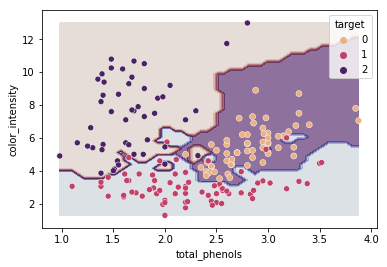

In [5]:
### GRADED
knn_pipe_1 = ''
    
### BEGIN SOLUTION
knn_pipe_1 = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=1))]).fit(X1, y)
### END SOLUTION

### ANSWER CHECK
print(knn_pipe_1)
make_plot(knn_pipe_1)

In [6]:
### BEGIN HIDDEN TESTS
knn_pipe_1_ = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=1))]).fit(X1, y)
#
#
#
assert knn_pipe_1.named_steps['model'].n_neighbors == knn_pipe_1_.named_steps['model'].n_neighbors
np.testing.assert_array_equal(knn_pipe_1.predict(X1), knn_pipe_1_.predict(X1))
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### KNN with `n_neighbors = 5`

**10 Points**


Next, build a pipeline named `knn_pipe_5` below with named steps `scale` and `model` that uses `StandardScaler` and `KNeighborsClassifier` with `n_neighbors = 5`.  Fit this to the data and visualize the decision boundary.

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])


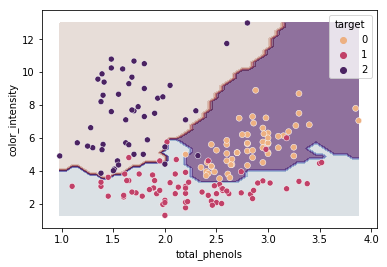

In [7]:
### GRADED
knn_pipe_5 = ''
    
### BEGIN SOLUTION
knn_pipe_5 = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=5))]).fit(X1, y)
### END SOLUTION

### ANSWER CHECK
print(knn_pipe_5)
make_plot(knn_pipe_5)

In [8]:
### BEGIN HIDDEN TESTS
knn_pipe_5_ = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=5))]).fit(X1, y)
#
#
#
assert knn_pipe_5.named_steps['model'].n_neighbors == knn_pipe_5_.named_steps['model'].n_neighbors
np.testing.assert_array_equal(knn_pipe_5.predict(X1), knn_pipe_5_.predict(X1))
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### `DecisionTreeClassifier` with `max_depth = 2`

**10 Points**

Now, fit a `DecisionTreeClassifier` with `max_depth = 2` and assign to `tree_depth_2` below.  Visualize the results and note the complexity of the decision boundary.

DecisionTreeClassifier(max_depth=2)


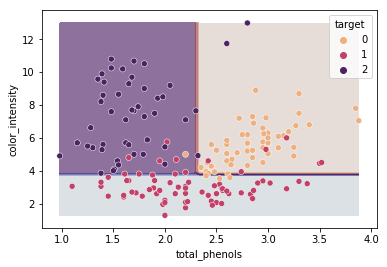

In [9]:
### GRADED
tree_depth_2 = ''
    
### BEGIN SOLUTION
tree_depth_2 = DecisionTreeClassifier(max_depth=2).fit(X1, y)
### END SOLUTION

### ANSWER CHECK
print(tree_depth_2)
make_plot(tree_depth_2)

In [10]:
### BEGIN HIDDEN TESTS
tree_depth_2_ = DecisionTreeClassifier(max_depth=2).fit(X1, y)
#
#
#
assert tree_depth_2.max_depth == tree_depth_2_.max_depth
np.testing.assert_array_equal(tree_depth_2.predict(X1), tree_depth_2_.predict(X1))
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### DecisionTreeClassifier with `max_depth = None`

**10 Points**

Finally, fit a `DecisionTreeClassifier` with `max_depth = None` and assign to `tree_depth_none` below.  Visualize the results and note the complexity of the decision boundary.

DecisionTreeClassifier()


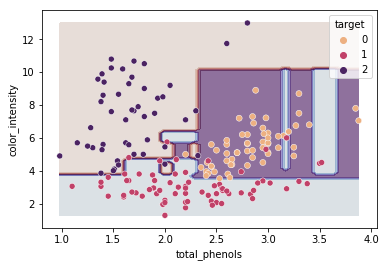

In [11]:
### GRADED
tree_depth_none = ''
    
### BEGIN SOLUTION
tree_depth_none = DecisionTreeClassifier(max_depth=None).fit(X1, y)
### END SOLUTION

### ANSWER CHECK
print(tree_depth_none)
make_plot(tree_depth_none)

In [12]:
### BEGIN HIDDEN TESTS
tree_depth_none_ = DecisionTreeClassifier(max_depth=None).fit(X1, y)
#
#
#
assert tree_depth_none.max_depth == tree_depth_none_.max_depth
np.testing.assert_array_equal(tree_depth_none.predict(X1), tree_depth_none_.predict(X1))
### END HIDDEN TESTS

### Problem 5

#### Complexity and Parameters in KNN and Decision Tree

**10 Points**

Based on the above results, which of the statements below would execute to increase the complexity of the decision boundaries?

```
a. Increase in `max_depth` and `n_neighbors`
b. Decrease in `max_depth` and `n_neighbors`
c. Increase in `max_depth` and  Decrease in `n_neighbors`
d. Decrease in `max_depth` and Increase in `n_neighbors`
```

Enter your answer choice as a string to `ans_5` below.

In [13]:
### GRADED
ans_5 = ''
    
### BEGIN SOLUTION
ans_5 = 'c'
### END SOLUTION

### ANSWER CHECK
print(ans_5)

c


In [14]:
### BEGIN HIDDEN TESTS
ans_5_ = 'c'
#
#
#
assert ans_5 == ans_5_
### END HIDDEN TESTS